In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [40]:
df = pd.read_csv('msft.csv')
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [3]:
print(df.isnull().sum())

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64


In [4]:
df = df.dropna()

In [28]:
print(df['Category'].unique)

<bound method Series.unique of 0                 Books
1                 Books
2                 Books
3                 Books
4                 Books
             ...       
5317    Developer Tools
5318    Developer Tools
5319    Developer Tools
5320    Developer Tools
5321                NaN
Name: Category, Length: 5322, dtype: object>


In [29]:
#print(df['Price'].unique)
print(df['Price'].unique)

<bound method Series.unique of 0           Free
1           Free
2           Free
3           Free
4           Free
          ...   
5317    ₹ 269.00
5318     ₹ 64.00
5319    ₹ 269.00
5320    ₹ 219.00
5321         NaN
Name: Price, Length: 5322, dtype: object>


In [37]:
category_count = df['Category'].value_counts().head(10)
category_count

Music                 753
Books                 707
Business              679
Health and Fitness    527
Developer Tools       500
Lifestyle             492
News and Weather      483
Kids and Family       345
Social                328
Food and Dining       166
Name: Category, dtype: int64

In [35]:
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_rating

Category
Government and Politics    4.050000
Kids and Family            3.947826
Developer Tools            3.886000
Lifestyle                  3.850610
Social                     3.847561
News and Weather           3.837474
Navigation and Maps        3.801948
Books                      3.791372
Food and Dining            3.789157
Health and Fitness         3.785579
Music                      3.759628
Business                   3.602356
Multimedia Design          3.551282
Name: Rating, dtype: float64

In [58]:
free_vs_paid = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()
free_vs_paid

Paid    5322
Name: Price, dtype: int64

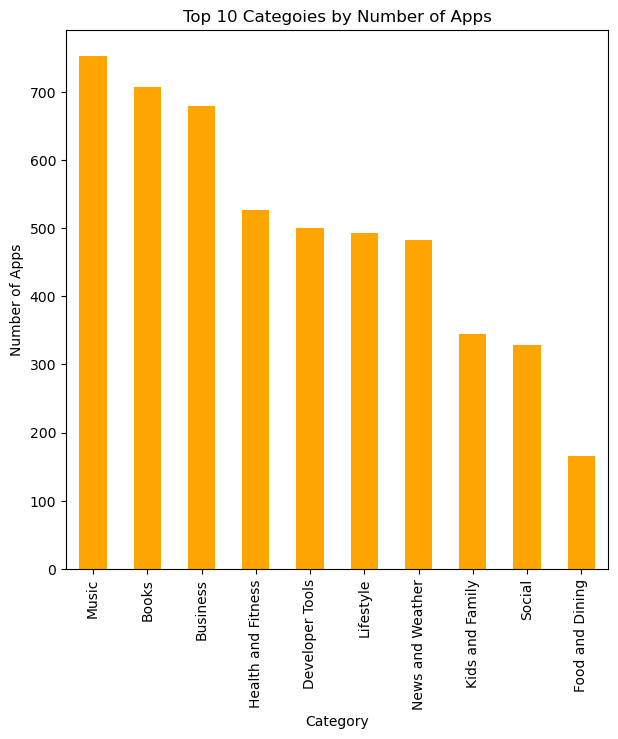

In [55]:
category_count.plot(kind='bar', color = 'orange', title='Top 10 Categoies by Number of Apps', figsize=(7,7))
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

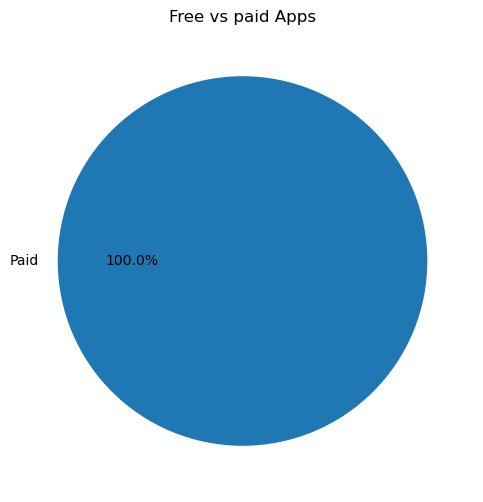

In [59]:
free_vs_paid.plot(kind='pie', autopct='%1.1f%%', title = 'Free vs paid Apps', figsize=(6,6))
plt.ylabel('')
plt.show()

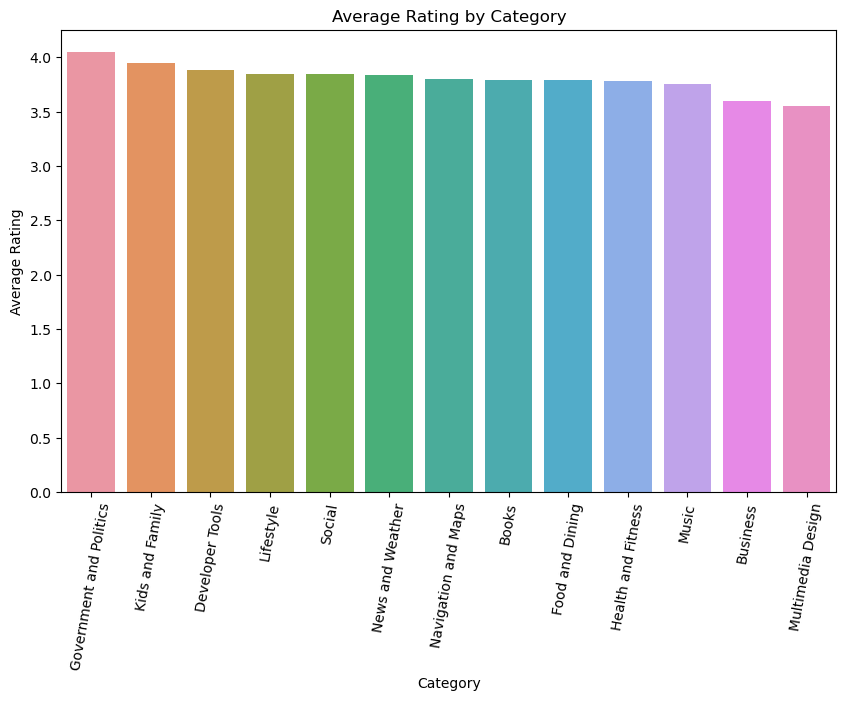

In [72]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=category_rating.index, y=category_rating.values)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=80)
plt.show()